# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [David Samuel Sitorus]
- **Email:** [sammysitorus23@gmail.com]
- **ID Dicoding:** [davidsam27]

## Menentukan Pertanyaan Bisnis

- Bagaimana kita dapat mengelompokkan pengguna berdasarkan perilaku sewa mereka menggunakan RFM?
- Bagaimana aktivitas penyewaan sepeda bervariasi pada jam-jam yang berbeda dalam sehari?
- Bisakah kita mengelompokkan penyewaan sepeda berdasarkan kondisi cuaca untuk memahami dampaknya terhadap jumlah penyewaan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv('data/day.csv')
hour_df = pd.read_csv('data/hour.csv')

In [3]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


day_df merupakan dataset dari peminjaman sepeda per hari, melainkan dataset hour_df mencakup per jam dari peminjaman sepeda

### Assessing Data

#### day_df

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Jika kita lihat, terdapat 731 entri dan tidak satupun dari sel yang bernilai null

In [6]:
day_df.duplicated().sum()

0

Dan pada day_df, tidak ada data yang terduplikasi

#### hour_df

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dalam hour_df, terdapat 17379 entri dan juga tidak satupun dari sel yang bernilai null

In [8]:
hour_df.duplicated().sum()

0

Dan pada hour_df, tidak ada data yang terduplikasi

### Cleaning Data

### day_df

dengan adanya "dteday" untuk tanggal dan "weekday" untuk hari di tanggal tersebut, "yr", "mnth", dan "workingday" tidak diperlukan

In [9]:
day_df = day_df.drop(columns = ['yr','mnth','workingday'])

In [10]:
day_df.head()

,instant,dteday,season,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,6,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,2,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,3,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [11]:
day_df.isna().sum()

instant       0
dteday        0
season        0
holiday       0
weekday       0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### hour_df

dengan adanya "dteday" untuk tanggal dan "weekday" untuk hari di tanggal tersebut, "yr", "mnth", dan "workingday" tidak diperlukan

In [12]:
hour_df = hour_df.drop(columns = ['yr','mnth','workingday'])

In [13]:
hour_df.head()

,instant,dteday,season,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,0,6,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,1,0,6,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,2,0,6,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,3,0,6,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,4,0,6,1,0.24,0.2879,0.75,0.0,0,1,1


In [14]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
hr            0
holiday       0
weekday       0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore day_df

In [15]:
day_df.head()

,instant,dteday,season,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,6,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,2,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,3,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Visualisasi total rental berdasarkan musim

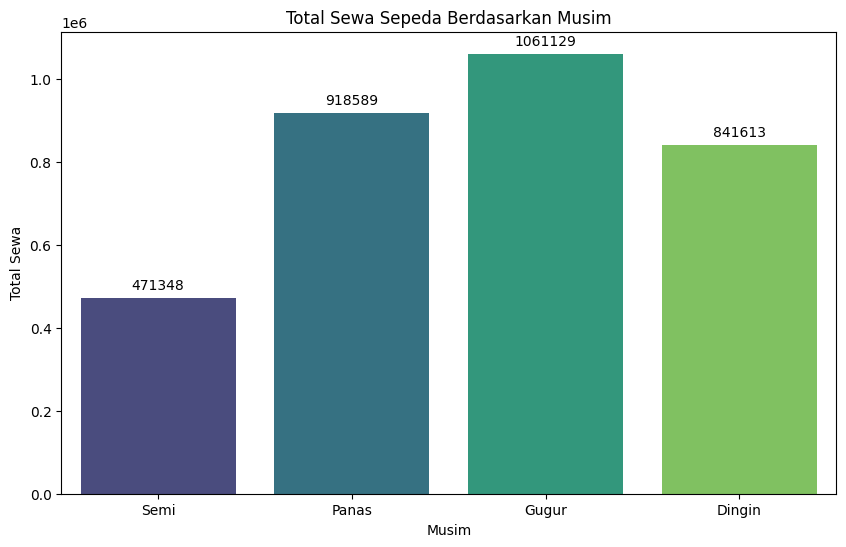

In [16]:
# Mapping musim sesuai dengan musim dari masing-masing angka
mapping_musim = {1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Dingin'}
day_df['nama_musim'] = day_df['season'].map(mapping_musim)

# Membuat plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='nama_musim', y='cnt', data=day_df, estimator=np.sum, palette='viridis', errorbar=None)

# Menambahkan angka di atas setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.title('Total Sewa Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Total Sewa')
plt.show()

Dari grafik tersebut, terlihat bahwa:
- Jumlah penyewaan tertinggi terjadi pada musim Gugur, diikuti oleh musim Panas.
- Musim Semi mencatat jumlah penyewaan terendah.
- Meskipun berada di musim Dingin, total penyewaan masih cukup tinggi dan hampir menyamai angka di musim Panas.

### Explore hour_df

In [17]:
hour_df.head()

,instant,dteday,season,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,0,6,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,1,0,6,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,2,0,6,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,3,0,6,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,4,0,6,1,0.24,0.2879,0.75,0.0,0,1,1


C:\Users\David's PC\AppData\Local\Temp\ipykernel_12264\1443505882.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = hour_df.corr()


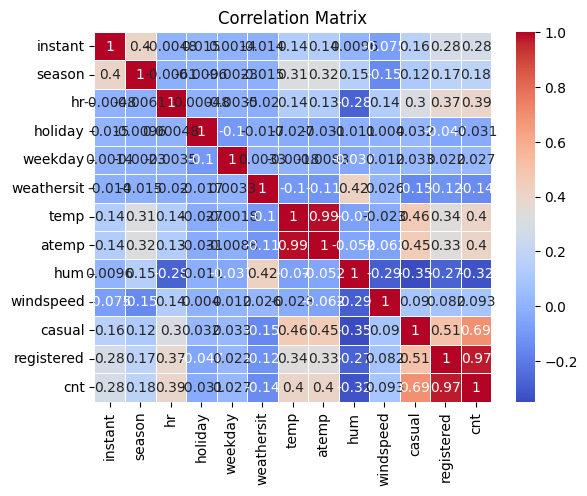

In [18]:
corr_matrix = hour_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Dengan Correlation Matrix diatas, kita bisa lihat korelasi tertinggi adalah temp dengan atemp. Korelasi mereka sangat dekat dikarenakan temp merupakan temperatur ternormalisasi, melainkan atemp merupakan suhu perasaan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana kita dapat mengelompokkan pengguna berdasarkan perilaku sewa mereka menggunakan RFM?

Dalam pertanyaan ini, kita akan menghitung metrik RFM untuk pengguna berdasarkan jumlah sewa mereka dan mengklasifikasikannya ke dalam segmen.

In [19]:
# Mengonversi 'dteday' menjadi format datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Ambil tanggal terakhir dalam dataset untuk perhitungan Recency
today = day_df['dteday'].max()

# Menghitung RFM
rfm = pd.DataFrame()
rfm['Recency'] = (today - day_df['dteday']).dt.days  # Menghitung Recency
rfm['Frequency'] = day_df['cnt']  # Menghitung Frequency
rfm['Monetary'] = day_df['cnt'] * 1  # Mengasumsikan $1 per sewa

# Menampilkan ringkasan RFM
print(rfm.describe())

# Mengelompokkan pengguna berdasarkan RFM
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=False)  # Semakin rendah semakin baik
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 4, labels=False)  # Semakin tinggi semakin baik
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=False)  # Semakin tinggi semakin baik

# Membuat skor gabungan
rfm['RFM_Score'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score']
print(rfm[['Recency', 'Frequency', 'Monetary', 'RFM_Score']])


          Recency    Frequency     Monetary
count  731.000000   731.000000   731.000000
mean   365.000000  4504.348837  4504.348837
std    211.165812  1937.211452  1937.211452
min      0.000000    22.000000    22.000000
25%    182.500000  3152.000000  3152.000000
50%    365.000000  4548.000000  4548.000000
75%    547.500000  5956.000000  5956.000000
max    730.000000  8714.000000  8714.000000
     Recency  Frequency  Monetary  RFM_Score
0        730        985       985          3
1        729        801       801          3
2        728       1349      1349          3
3        727       1562      1562          3
4        726       1600      1600          3
..       ...        ...       ...        ...
726        4       2114      2114          0
727        3       3095      3095          0
728        2       1341      1341          0
729        1       1796      1796          0
730        0       2729      2729          0

[731 rows x 4 columns]


Diatas merupakan Recency, Frequency, Monetary, dan RFM Score dari df yang digunakan

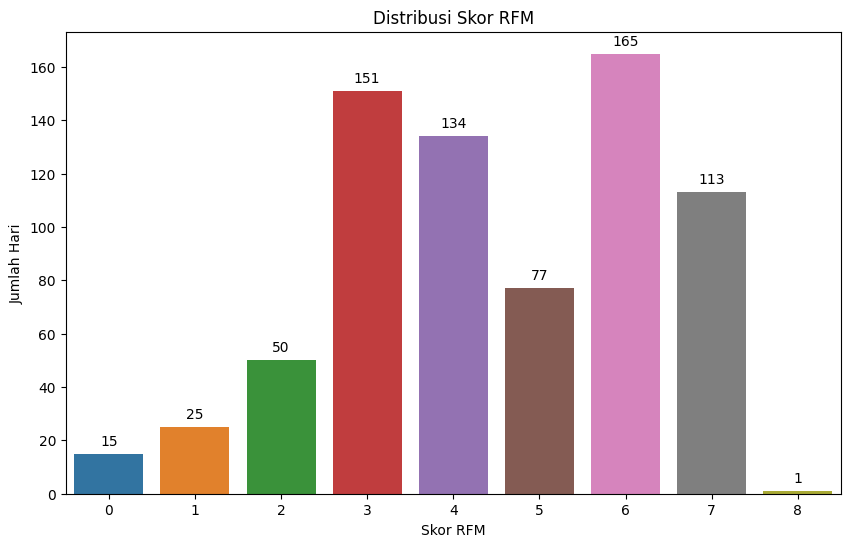

In [20]:
# Membuat hitungan setiap skor RFM
rfm_score_counts = rfm['RFM_Score'].value_counts().sort_index()

# Membuat plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=rfm_score_counts.index, y=rfm_score_counts.values)

# Menambahkan angka di atas setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
    

plt.title('Distribusi Skor RFM')
plt.xlabel('Skor RFM')
plt.ylabel('Jumlah Hari')
plt.xticks(rotation=0)
plt.show()


Dari grafik tersebut, kita dapat melihat bahwa sebagian besar pelanggan memiliki skor RFM di kisaran 3 hingga 6, dengan puncak pada skor 6 yang mencapai sekitar 160 hari.

### Pertanyaan 2: Bagaimana aktivitas penyewaan sepeda bervariasi pada jam-jam yang berbeda dalam sehari?

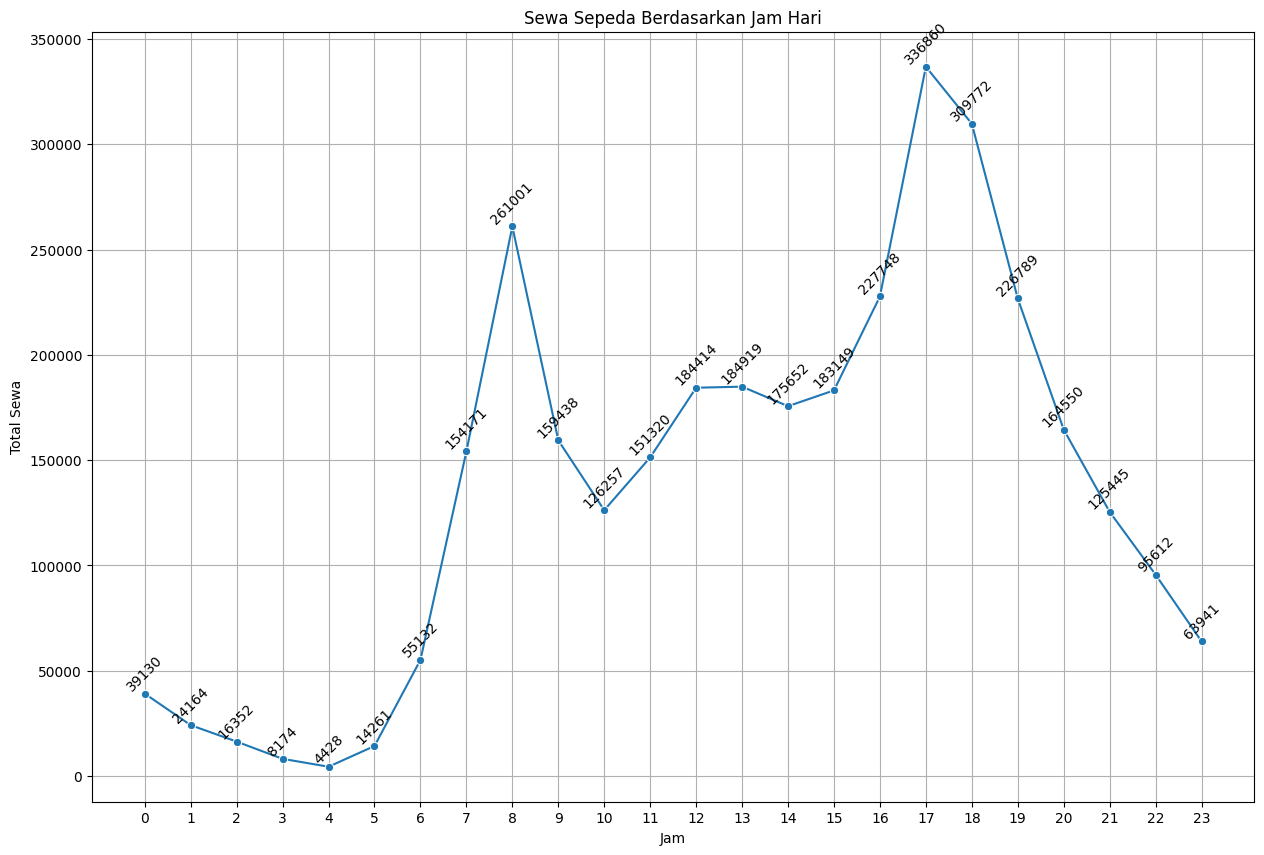

In [21]:
hourly_rentals = hour_df.groupby('hr')['cnt'].sum().reset_index()

# Memvisualisasikan data
plt.figure(figsize=(15, 10))
ax = sns.lineplot(data=hourly_rentals, x='hr', y='cnt', marker='o')

for x, y in zip(hourly_rentals['hr'], hourly_rentals['cnt']):
    plt.text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=10, rotation = 45)
    
plt.title('Sewa Sepeda Berdasarkan Jam Hari')
plt.xlabel('Jam')
plt.ylabel('Total Sewa')
plt.xticks(hourly_rentals['hr'])
plt.grid()
plt.show()

Dari grafik tersebut, kita bisa melihat beberapa pola utama:

- Puncak pertama (jam 8): Terdapat lonjakan tajam dalam penyewaan sepeda sekitar pukul 8 pagi, yang mencapai lebih dari 250.000 sewa. Ini mungkin terkait dengan aktivitas pagi hari, seperti orang-orang yang berangkat bekerja atau berolahraga.

- Penurunan setelah puncak pagi: Setelah jam 8, aktivitas sewa menurun tajam hingga pukul 10, dan mulai stabil di angka yang lebih rendah hingga sekitar tengah hari (jam 12-13).

- Puncak kedua (jam 17): Aktivitas sewa kembali mengalami peningkatan signifikan pada sore hari, dengan puncaknya di sekitar jam 17. Ini bisa dikaitkan dengan orang-orang pulang kerja atau aktivitas sore hari lainnya.

- Penurunan setelah jam 18: Setelah jam 18, jumlah sewa sepeda mulai menurun, menunjukkan bahwa penggunaan sepeda cenderung berkurang menjelang malam.

### Pertanyaan 3: Dapatkah kita mengelompokkan sewa sepeda berdasarkan kondisi cuaca untuk memahami dampaknya terhadap jumlah sewa?

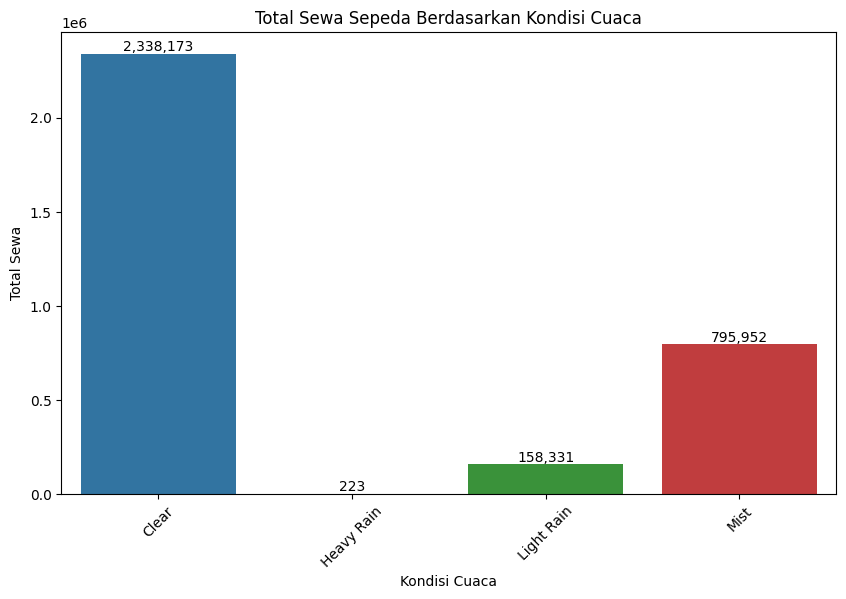

In [22]:
weather_mapping = {
    1: 'Clear',
    2: 'Mist',
    3: 'Light Rain',
    4: 'Heavy Rain'
}
hour_df['weather_condition'] = hour_df['weathersit'].map(weather_mapping)

# Mengelompokkan berdasarkan kondisi cuaca dan merangkum total sewa
weather_grouped = hour_df.groupby('weather_condition')['cnt'].sum().reset_index()

# Membuat label per bar
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], f'{y[i]:,.0f}', ha='center', va='bottom', fontsize=10)

# Memvisualisasikan hasil
plt.figure(figsize=(10, 6))
sns.barplot(data=weather_grouped, x='weather_condition', y='cnt')
addlabels(weather_grouped['weather_condition'], weather_grouped['cnt'])
plt.title('Total Sewa Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Total Sewa')
plt.xticks(rotation=45)
plt.show()


Berdasarkan bar chart di atas, berikut adalah beberapa kesimpulan terkait total sewa sepeda berdasarkan kondisi cuaca:

- Cuaca Cerah (Clear): Merupakan kondisi cuaca dengan jumlah sewa sepeda tertinggi, mencapai lebih dari 2,3 juta total sewa. Ini menunjukkan bahwa penyewaan sepeda paling populer ketika cuaca cerah, kemungkinan karena cuaca yang mendukung untuk aktivitas luar ruangan.

- Cuaca Berkabut (Mist): Meskipun jauh di bawah cuaca cerah, kondisi berkabut masih memiliki jumlah total sewa yang cukup tinggi, sekitar 795.952. Hal ini menunjukkan bahwa kabut ringan tidak secara signifikan menghambat penyewaan sepeda.

- Hujan Ringan (Light Rain): Penyewaan sepeda menurun cukup signifikan saat terjadi hujan ringan, dengan total sewa sekitar 158.331. Ini mengindikasikan bahwa pengguna mungkin kurang tertarik menyewa sepeda dalam kondisi hujan, meskipun tidak terlalu lebat.

- Hujan Lebat (Heavy Rain): Jumlah sewa sepeda paling rendah terjadi saat hujan lebat, hanya sebanyak 223 total sewa. Ini menunjukkan bahwa hujan lebat hampir sepenuhnya menghentikan aktivitas penyewaan sepeda, mungkin karena faktor keselamatan dan kenyamanan.

## Conclusion

- Kita dapat mengelompokkan pengguna berdasarkan perilaku sewa mereka dengan cara menghitung metrik RFM untuk pengguna berdasarkan jumlah sewa mereka dan mengklasifikasikannya ke dalam segmen. Hasil menunjukkan bahwa mayoritas pelanggan berada pada rentang menengah dalam hal perilaku sewa mereka, baik dari segi frekuensi, nilai transaksi, maupun waktu terakhir bertransaksi.
- Aktivitas penyewaan sepeda cenderung tinggi pada pagi hari sekitar jam 8 dan sore hari sekitar jam 17, dengan penurunan yang signifikan pada siang dan malam hari. Pola ini menunjukkan dua waktu sibuk utama dalam sehari untuk sewa sepeda, yang kemungkinan besar terkait dengan jam sibuk berangkat dan pulang kerja.
- Jumlah penyewaan sepeda tertinggi terjadi saat cuaca cerah, sementara penyewaan menurun signifikan pada kondisi berkabut, hujan ringan, dan hampir berhenti total saat hujan lebat.